# Part 1: Revenue Forcast

In [68]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [69]:
df = pd.read_csv('Ascendeum_Dataset2.csv')
df.head()

,date,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
0,2019-06-30 00:00:00,351,10,187,2,84,3473,19,60,1,4,5174,16,0.0,2,16,1
1,2019-06-30 00:00:00,351,10,187,2,84,3473,19,58,1,4,5174,6,0.0,0,6,1
2,2019-06-30 00:00:00,351,10,147,2,84,3473,19,60,1,4,5174,4,0.0,0,4,1
3,2019-06-30 00:00:00,351,10,147,2,84,3473,19,58,1,4,5174,4,0.0,0,4,1
4,2019-06-30 00:00:00,348,10,147,3,79,3463,20,59,1,19,5138,4,0.0,0,4,1


In [70]:
df2 = df.copy()

In [71]:
df.shape

(567291, 17)

### Downsample in order to be able to run newral network with CPU

In [72]:
df['delete'] = np.arange(len(df))
df['delete'].apply(lambda i: 1 if i % 5 == 0 else 0)

0         1
1         0
2         0
3         0
4         0
         ..
567286    0
567287    0
567288    0
567289    0
567290    1
Name: delete, Length: 567291, dtype: int64

In [73]:
df['revenue'] = 0
df['revenue'][df['total_revenue'] >= 0.05] = 1

In [5]:
def f1(el):
    return el == 0

def f2(el):
    return el == 1

df1 = df[df['delete'].map(f1)]
df = df[df['revenue'].map(f2)]

In [125]:
df.shape

(46336, 19)

In [6]:
df.drop(['line_item_type_id', 'order_id','delete', 'revenue'], axis=1, inplace=True)

In [127]:
table = []
for col in df.columns:
    table.append((col, df[col].dtype, df[col].nunique(), df[col].isna().sum() ))
    
pd.DataFrame(table, columns=['Name', 'Type', 'Unique value', 'Missing Value'])

,Name,Type,Unique value,Missing Value
0,date,object,30,0
1,site_id,int64,10,0
2,ad_type_id,int64,2,0
3,geo_id,int64,113,0
4,device_category_id,int64,4,0
5,advertiser_id,int64,11,0
6,os_id,int64,7,0
7,integration_type_id,int64,1,0
8,monetization_channel_id,int64,4,0
9,ad_unit_id,int64,111,0


In [7]:
# Drop values with only one or too many values
df.drop(['integration_type_id', 'revenue_share_percent','geo_id','ad_unit_id'], axis=1, inplace=True)

In [129]:
table = []
for col in df.columns:
    table.append((col, df[col].dtype, df[col].nunique(), df[col].isna().sum() ))
    
pd.DataFrame(table, columns=['Name', 'Type', 'Unique value', 'Missing Value'])

,Name,Type,Unique value,Missing Value
0,date,object,30,0
1,site_id,int64,10,0
2,ad_type_id,int64,2,0
3,device_category_id,int64,4,0
4,advertiser_id,int64,11,0
5,os_id,int64,7,0
6,monetization_channel_id,int64,4,0
7,total_impressions,int64,1913,0
8,total_revenue,float64,9848,0
9,viewable_impressions,int64,1106,0


## EDA

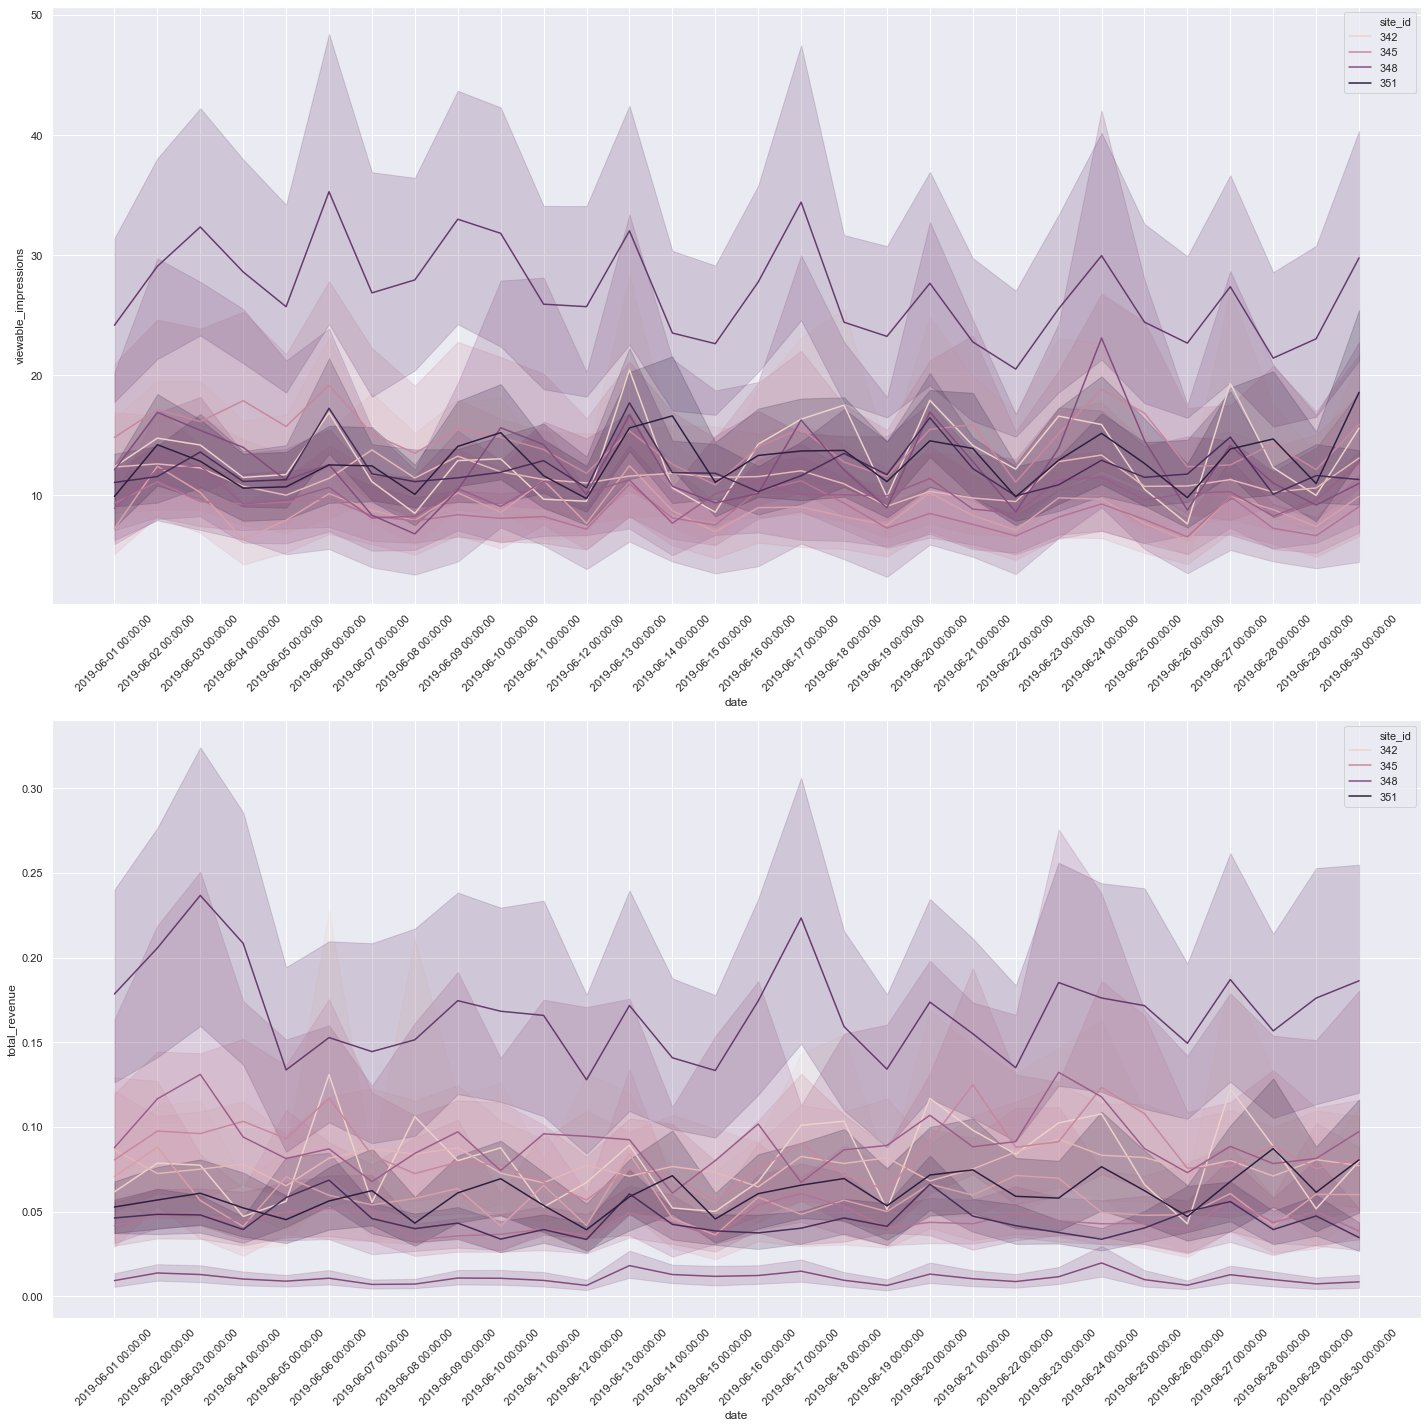

In [102]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(2,1, figsize=(20, 20))
plt.subplot(2,1,1)
sns.lineplot(x="date", y="viewable_impressions", hue="site_id",data=df)
plt.xticks(rotation=45)
plt.subplot(2,1,2)
sns.lineplot(x="date", y="total_revenue",hue="site_id",data=df)
plt.xticks(rotation=45)

plt.tight_layout()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

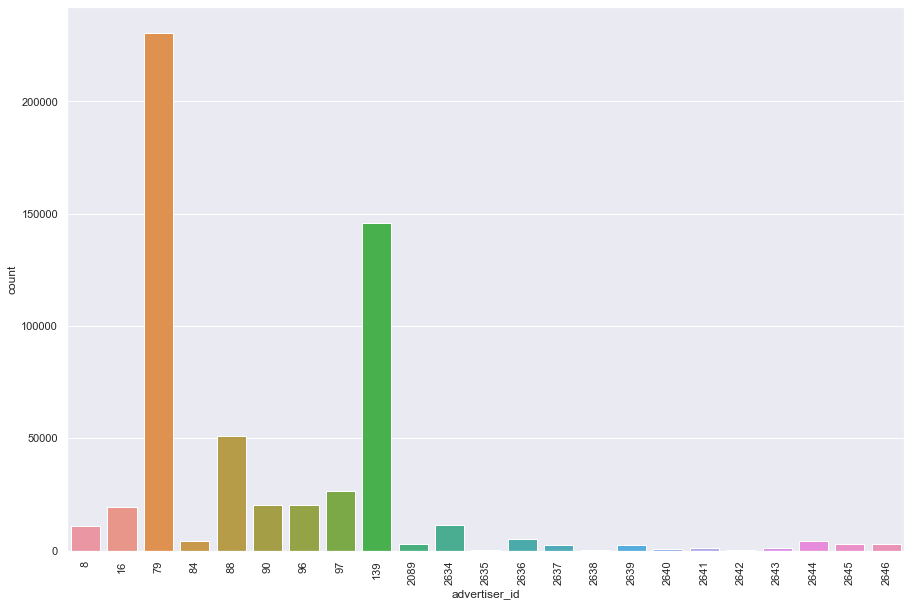

In [103]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='advertiser_id')
plt.xticks(rotation=90)

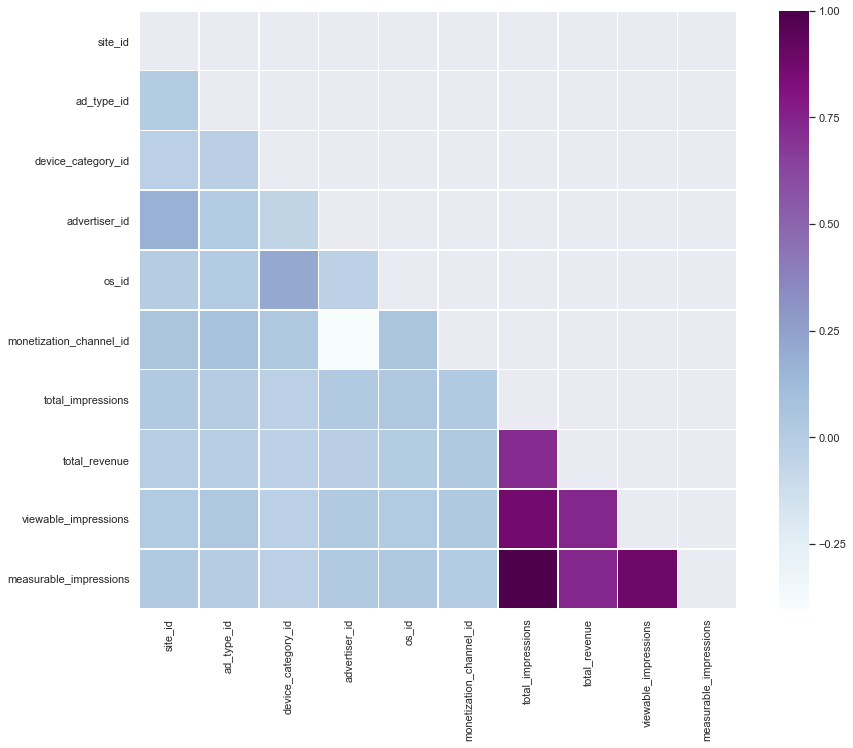

In [104]:
corr_corr = df.corr()

mask = np.zeros_like(corr_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (15, 11))

sns.heatmap(corr_corr, mask = mask, square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

In [105]:
c = df.corr()['total_revenue']
c.sort_values(ascending=False)

total_revenue              1.000000
viewable_impressions       0.742076
measurable_impressions     0.732053
total_impressions          0.730177
monetization_channel_id    0.033396
os_id                      0.006672
site_id                   -0.003210
ad_type_id                -0.006769
advertiser_id             -0.018701
device_category_id        -0.030964
Name: total_revenue, dtype: float64

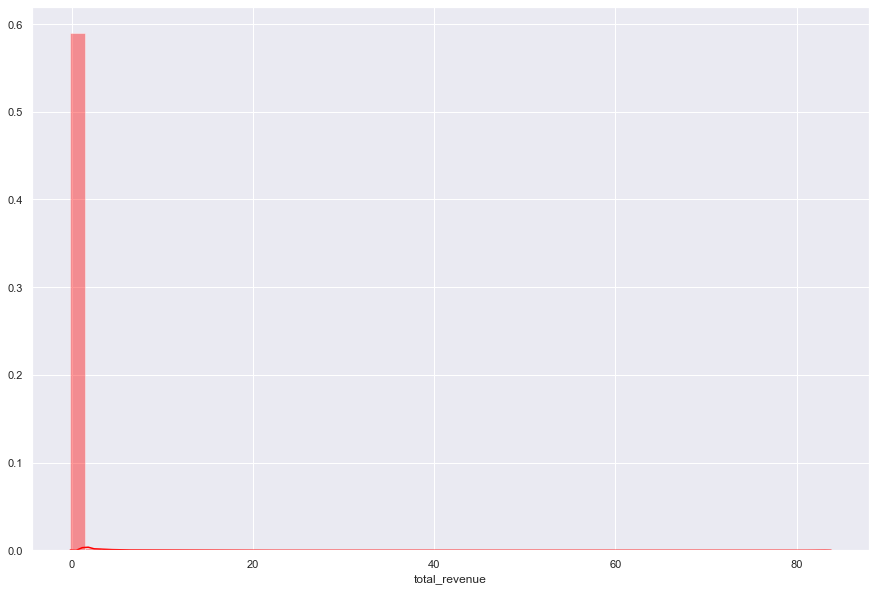

In [115]:
plt.figure(figsize=(15,10))
sns.distplot(df['total_revenue'], norm_hist=True, color = 'red')

> Target variable is highly right skewed

## Data Processing

In [8]:
cat_cals = ['site_id','ad_type_id','device_category_id', 'advertiser_id','os_id', 'monetization_channel_id']


In [9]:
df[cat_cals] = df[cat_cals].astype(str)

In [10]:
# Process Date
df.date = df.date.str.replace('-','')

In [11]:
df.date

285       20190630 00:00:00
286       20190630 00:00:00
287       20190630 00:00:00
319       20190630 00:00:00
320       20190630 00:00:00
                ...        
567258    20190601 00:00:00
567259    20190601 00:00:00
567261    20190601 00:00:00
567262    20190601 00:00:00
567287    20190601 00:00:00
Name: date, Length: 46336, dtype: object

In [12]:
df.date = df.date.str.split(' ', expand=True)
df.date = df.date.astype('int64')

In [135]:
df.head()

,date,site_id,ad_type_id,device_category_id,advertiser_id,os_id,monetization_channel_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions
285,20190630,351,10,3,8,59,4,168,0.3704,84,168
286,20190630,351,10,3,8,55,4,34,0.0958,16,34
287,20190630,351,10,2,8,58,4,4,0.0706,2,4
319,20190630,351,10,3,16,59,19,922,1.5398,422,894
320,20190630,351,10,3,16,55,19,98,0.2396,40,92


In [136]:
table = []
for col in df.columns:
    table.append((col, df[col].dtype, df[col].nunique(), df[col].isna().sum() ))
    
pd.DataFrame(table, columns=['Name', 'Type', 'Unique value', 'Missing Value'])

,Name,Type,Unique value,Missing Value
0,date,int64,30,0
1,site_id,object,10,0
2,ad_type_id,object,2,0
3,device_category_id,object,4,0
4,advertiser_id,object,11,0
5,os_id,object,7,0
6,monetization_channel_id,object,4,0
7,total_impressions,int64,1913,0
8,total_revenue,float64,9848,0
9,viewable_impressions,int64,1106,0


In [13]:
df = pd.get_dummies(df)

In [14]:
df.shape

(46336, 43)

## Data transformation for LSTM model

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [16]:
df_scaled.reset_index(inplace=True)

In [17]:
df_scaled['index']

0            0
1            1
2            2
3            3
4            4
         ...  
46331    46331
46332    46332
46333    46333
46334    46334
46335    46335
Name: index, Length: 46336, dtype: int64

In [18]:
target_column = 3 # the column index value of the target column
train_size = 0.6
split_idx = int(df_scaled.shape[0]*train_size) # index nummer to split at
split_idx

27801

In [19]:
X = df_scaled.drop(['total_revenue'],axis=1)
y = df_scaled['total_revenue']

In [20]:
# ...train
X_train = X.values[:split_idx,]
y_train = y.values[:split_idx,]

# ...test
X_test = X.values[split_idx:,]
y_test = y.values[split_idx:,]

In [245]:
X_train

array([[0.00000000e+00, 1.00000000e+00, 1.14878893e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 2.21453287e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.00000000e+00, 1.38408304e-04, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [2.77980000e+04, 4.13793103e-01, 1.73010381e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.77990000e+04, 4.13793103e-01, 2.49134948e-03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.78000000e+04, 4.13793103e-01, 1.07958478e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [256]:
X_train.shape

(27801, 43)

In [247]:
tmp = df.groupby(['date']).size().reset_index()
tmp['avg'] = sum(tmp[0]) / 30
tmp['avg'][0]

1544.5333333333333

In [310]:
look_back = 5 # look back 2 steps
n_features = 43 # using 2 feautures
output_dim = 1 # to predict 1 y value

In [311]:
samples = len(X_train) # total amount of samples
samples

27801

In [312]:
samples_train = X_train.shape[0] - look_back 
samples_train

27796

In [313]:
# Define zeros array with the target shape
X_train_reshaped = np.zeros((samples_train, look_back, n_features))
y_train_reshaped = np.zeros((samples_train))
X_train_reshaped.shape

(27796, 5, 43)

In [314]:
X_train

array([[0.00000000e+00, 1.00000000e+00, 1.14878893e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 2.21453287e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.00000000e+00, 1.38408304e-04, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [2.77980000e+04, 4.13793103e-01, 1.73010381e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.77990000e+04, 4.13793103e-01, 2.49134948e-03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.78000000e+04, 4.13793103e-01, 1.07958478e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [315]:
X_train_reshaped

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

  

In [316]:
# Create the reshaped train data
for i in range(samples_train):
    y_position = i + look_back
    X_train_reshaped[i] = X_train[i:y_position]
    y_train_reshaped[i] = y_train[y_position]

In [317]:
len(X_train_reshaped[0])

5

In [318]:
len(X_train[10:18910])

18900

In [319]:
y_position

27800

In [320]:
X_train.shape

(27801, 43)

In [321]:
# Do the same for the test data
samples_test = X_test.shape[0] - look_back
X_test_reshaped = np.zeros((samples_test, look_back, n_features))
y_test_reshaped = np.zeros((samples_test))

for i in range(samples_test):
    y_position = i + look_back
    X_test_reshaped[i] = X_test[i:y_position]
    y_test_reshaped[i] = y_test[y_position]

# Modelling

## LSTM

In [322]:
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
import dask.dataframe as dd
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers import TimeDistributed
from keras.layers.recurrent import LSTM
from keras.layers import Dense, Conv1D, MaxPool2D, Flatten, Dropout, GRU, CuDNNLSTM
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, SGD, Nadam
from time import time
from livelossplot import PlotLossesKeras
from keras.layers.advanced_activations import LeakyReLU, PReLU
import tensorflow as tf
#from keras.utils.training_utils import multi_gpu_model
from tensorflow.python.client import device_lib
from sklearn.preprocessing import StandardScaler

In [270]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=128,
  input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])
))
model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.01)
)

In [271]:
history = model.fit(
    X_train_reshaped, y_train_reshaped,
    epochs=10,
    batch_size=100,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Train on 24930 samples, validate on 2771 samples
Epoch 1/10
24930/24930 [==============================] - 106s 4ms/step - loss: 0.0036 - val_loss: 6.8408e-04
Epoch 2/10
24930/24930 [==============================] - 86s 3ms/step - loss: 0.0188 - val_loss: 7.0868e-04
Epoch 3/10
24930/24930 [==============================] - 84s 3ms/step - loss: 0.0024 - val_loss: 6.9737e-04
Epoch 4/10
24930/24930 [==============================] - 83s 3ms/step - loss: 9.1069e-04 - val_loss: 7.1935e-04
Epoch 5/10
24930/24930 [==============================] - 82s 3ms/step - loss: 9.1838e-04 - val_loss: 6.5134e-04
Epoch 6/10
24930/24930 [==============================] - 80s 3ms/step - loss: 9.2438e-04 - val_loss: 6.7368e-04
Epoch 7/10
24930/24930 [==============================] - 81s 3ms/step - loss: 9.2037e-04 - val_loss: 6.6747e-04
Epoch 8/10
24930/24930 [==============================] - 80s 3ms/step - loss: 9.3652e-04 - val_loss: 6.5653e-04
Epoch 9/10
24930/24930 [==============================] - 

In [272]:
y_pred = model.predict(X_test_reshaped)

In [323]:
X_test_reshaped

array([[[2.78010000e+04, 4.13793103e-01, 2.07612457e-03, ...,
         1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.78020000e+04, 4.13793103e-01, 5.67474048e-03, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        [2.78030000e+04, 4.13793103e-01, 2.76816609e-04, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        [2.78040000e+04, 4.13793103e-01, 3.73702422e-03, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        [2.78050000e+04, 4.13793103e-01, 4.42906574e-03, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00]],

       [[2.78020000e+04, 4.13793103e-01, 5.67474048e-03, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        [2.78030000e+04, 4.13793103e-01, 2.76816609e-04, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        [2.78040000e+04, 4.13793103e-01, 3.73702422e-03, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        [2.78050000e+04, 4.13793103e-0

In [305]:
y_pred[:,0]

array([0.0032401, 0.0032401, 0.0032401, ..., 0.0032401, 0.0032401,
       0.0032401], dtype=float32)

In [226]:
y_test[:18435]

array([0.00151363, 0.00121043, 0.00044884, ..., 0.00398701, 0.00112209,
       0.02294323])

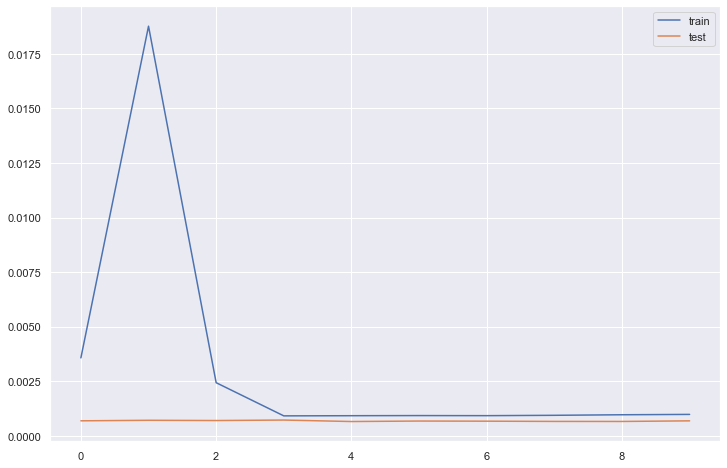

In [284]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

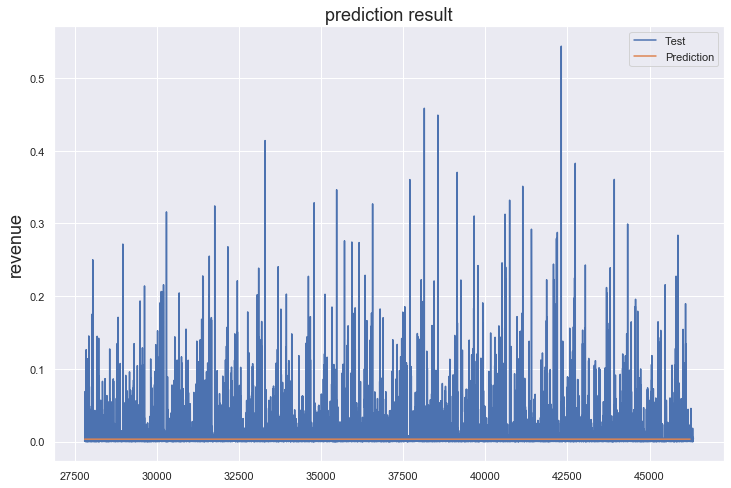

In [307]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(X_test[:,0], y_test, label='Test')
ax.plot(X_test[:18435,0], y_pred[:,0], label='Prediction')
ax.legend()
plt.ylabel('revenue',fontsize=18)
plt.title('prediction result',fontsize=18)
plt.show()

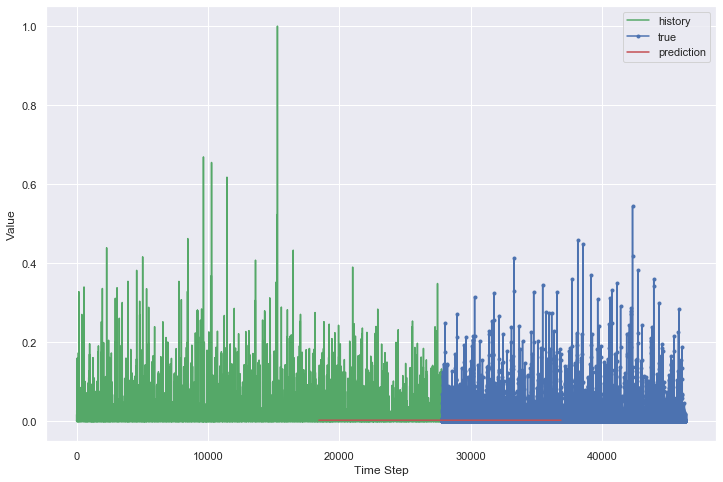

In [282]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train[:18435]), len(y_train[:18435]) + len(y_test[:18435])), y_pred[:,0], 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

> The data is too small for the model to perform precisely <br>
> Now let's try simple ARIMA model

## ARIMA

In [31]:
import itertools
import statsmodels.api as sm
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [61]:
y2 = df2['total_revenue']

In [60]:
y2.shape

(567291,)

In [29]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model2 = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            
            results = model2.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

        except:
            continue

In [63]:
model2 = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = model2.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1765      0.002     87.649      0.000       0.173       0.180
ma.L1         -1.0000      0.743     -1.346      0.178      -2.456       0.456
ar.S.L12      -0.5080      0.001   -524.778      0.000      -0.510      -0.506
sigma2         0.0012      0.001      1.345      0.179      -0.001       0.003


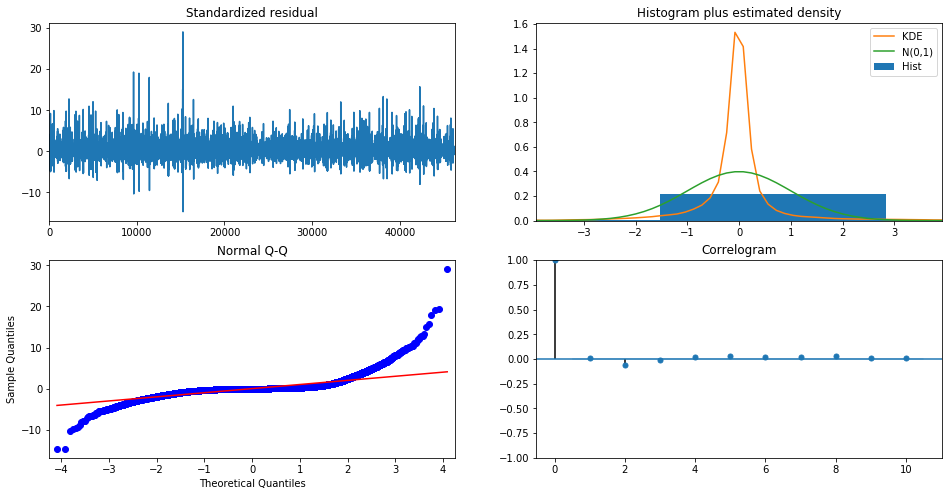

In [33]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [37]:
y_test.shape

(18535,)

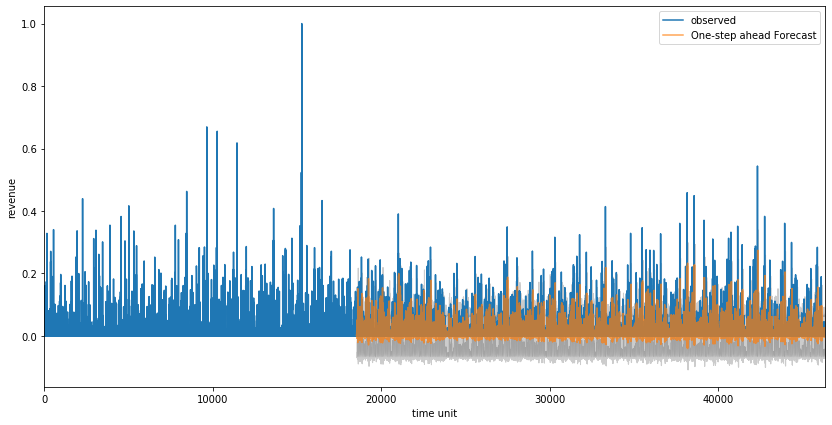

In [46]:
pred = results.get_prediction(start=170187, dynamic=False)
pred_ci = pred.conf_int()
ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('time unit')
ax.set_ylabel('revenue')
plt.legend()
plt.show()

In [65]:
y_forecasted = pred.predicted_mean
y_truth = y[18535:]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(mse))

The Mean Squared Error of our forecasts is 0.001017157366005254


In [86]:
print('Normalized MSE', mse / df['total_revenue'].max() - df['total_revenue'].min())

Normalized MSE 0.1542121347303334


> The prediction is much better than LSTM

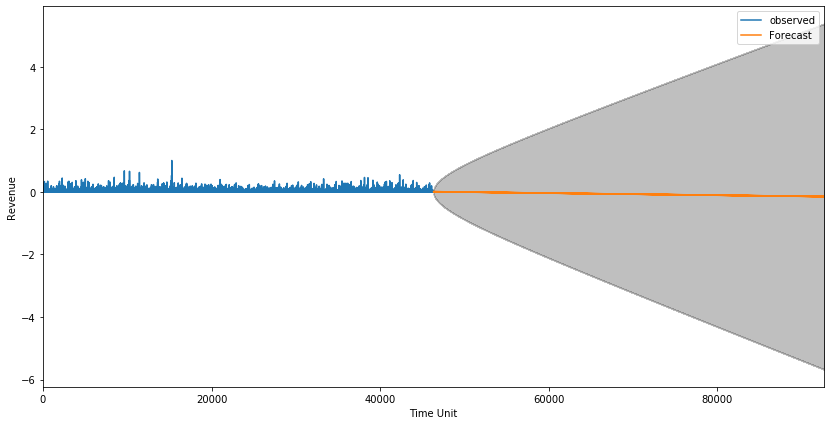

In [47]:
pred_uc = results.get_forecast(steps=46336, dynamic=False)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Unit')
ax.set_ylabel('Revenue')
plt.legend()
plt.show()

In [83]:
pred_ci['upper total_revenue'].sum()

138128.0132418686

In [85]:
final = pred_ci['upper total_revenue']

In [76]:
final.to_csv('forcast.csv', index=False)

### The potential revenue is 138128, according to ARIMA model.

# Part 2: Find Best Reserved Price

## Private-Value-Free Algorithm

In [87]:
#Function to estimate the reserve price per client using the algorithm described in the report
def get_reserve_price(df, M):
    reserve_prices = dict()
    
    for i in range(len(df['site_id'].unique())):
        tmp = df[df['site_id'] == df['site_id'].unique()[i]]
        tmp.reset_index(inplace = True)
        reserve_price = 0.0
        
        for j in range(M):
            if tmp['total_impressions'][j] != 0:
                reserve_price += 1000*tmp['total_revenue'][j]/tmp['total_impressions'][j]

        reserve_prices[df['site_id'].unique()[i]] = reserve_price/M
    
    return reserve_prices

In [88]:
reserve_prices = get_reserve_price(df, 10)

In [89]:
reserve_prices

{351: 0.0,
 348: 0.6941761904761903,
 350: 0.0,
 346: 0.76,
 349: 3.2033188707843885,
 345: 7.220000000000001,
 347: 0.0,
 344: 0.0,
 343: 0.0,
 342: 2.3597651911788042}

## Above is the best bidding price forcast